---
title: "Practicum Process Technology - Lorentz Animation"
author: "Mattia Galanti"
update: "10/11/2025"
---

Saved: lorenz_rho_sweep.gif ✅


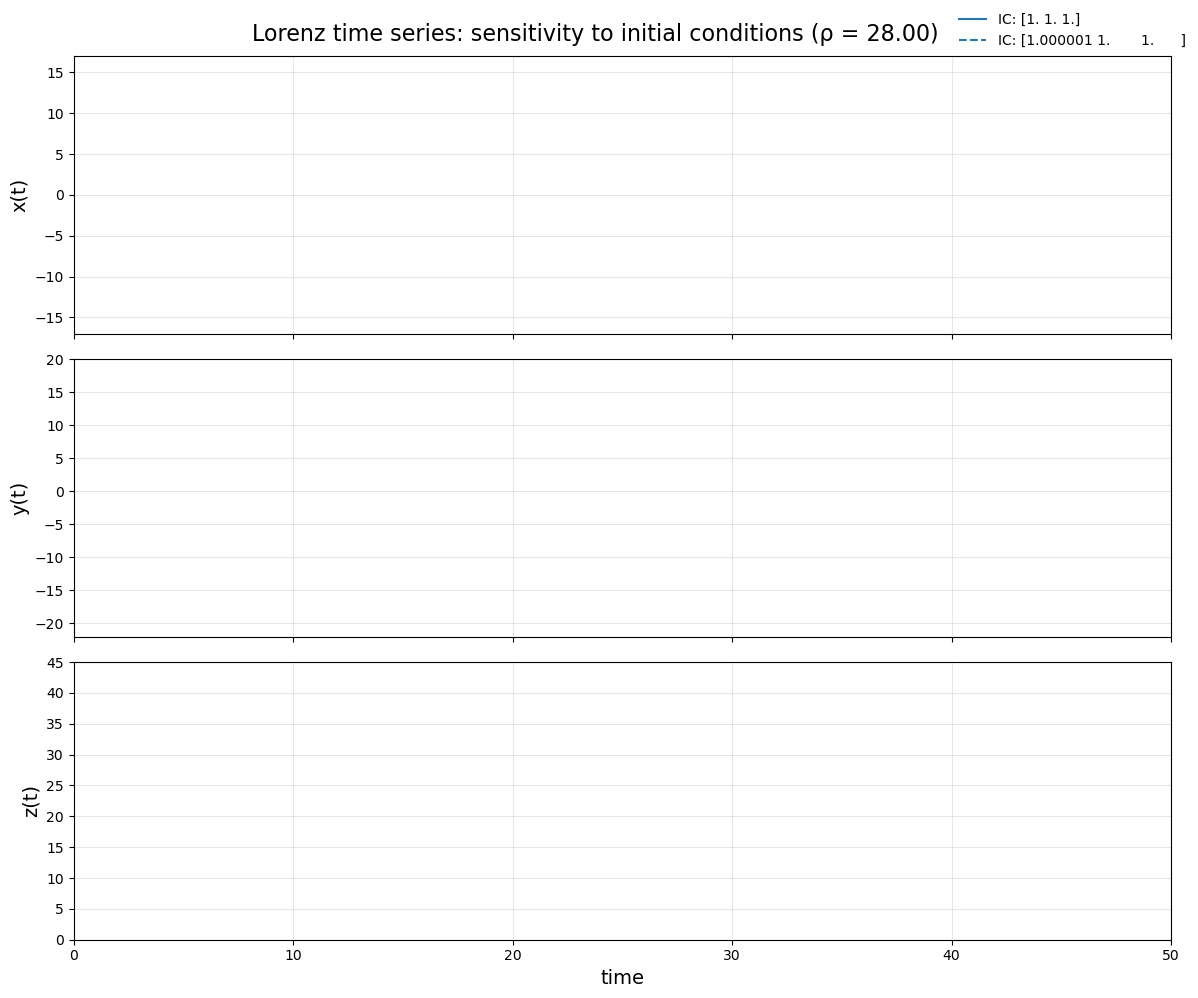

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from IPython.display import HTML
from matplotlib.animation import PillowWriter
from PIL import Image, ImageSequence


# So Jupyter will render animations inline as JS by default
plt.rcParams["animation.html"] = "jshtml"

def lorenz_system(t, y, Pr, Ra, beta):
    x, y_, z = y
    dx = Pr * (y_ - x)
    dy = x * (Ra - z) - y_
    dz = x * y_ - beta * z
    return [dx, dy, dz]

# Parameters & ICs
sigma = 10.0
beta  = 8.0 / 3.0
rho_min, rho_max = 0.1, 28.0

y0   = np.array([1.0, 1.0, 1.0])
eps  = 1e-6
y0_2 = y0 + np.array([eps, 0.0, 0.0])

t_span = (0.0, 50.0)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

method = "RK45"
rtol, atol = 3e-7, 1e-10

# Animation sweep
n_frames = 120
rho_values = np.linspace(rho_min, rho_max, n_frames)

# Precompute
X1_list, Y1_list, Z1_list = [], [], []
X2_list, Y2_list, Z2_list = [], [], []
for rho in rho_values:
    sol1 = solve_ivp(lorenz_system, t_span, y0,   args=(sigma, rho, beta),
                     t_eval=t_eval, method=method, rtol=rtol, atol=atol)
    sol2 = solve_ivp(lorenz_system, t_span, y0_2, args=(sigma, rho, beta),
                     t_eval=t_eval, method=method, rtol=rtol, atol=atol)
    X1, Y1, Z1 = sol1.y
    X2, Y2, Z2 = sol2.y
    X1_list.append(X1); Y1_list.append(Y1); Z1_list.append(Z1)
    X2_list.append(X2); Y2_list.append(Y2); Z2_list.append(Z2)

# Figure
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
(line_x1,) = axes[0].plot([], [], lw=1.5)
(line_x2,) = axes[0].plot([], [], lw=1.5, ls="--")
axes[0].set_ylabel("x(t)", fontsize=14); axes[0].grid(alpha=0.3)

(line_y1,) = axes[1].plot([], [], lw=1.5)
(line_y2,) = axes[1].plot([], [], lw=1.5, ls="--")
axes[1].set_ylabel("y(t)", fontsize=14); axes[1].grid(alpha=0.3)

(line_z1,) = axes[2].plot([], [], lw=1.5)
(line_z2,) = axes[2].plot([], [], lw=1.5, ls="--")
axes[2].set_ylabel("z(t)", fontsize=14)
axes[2].set_xlabel("time", fontsize=14)
axes[2].grid(alpha=0.3)

# Fix axes (no enlargement)
axes[0].set_ylim(-17, 17)   # x(t)
axes[1].set_ylim(-22, 20)   # y(t)
axes[2].set_ylim(0, 45)     # z(t)
axes[2].set_xlim(t_eval[0], t_eval[-1])

fig.suptitle("Lorenz time series: sensitivity to initial conditions (animated over ρ)", fontsize=16)
legend_lines = [Line2D([0],[0], lw=1.5, ls="-"),
                Line2D([0],[0], lw=1.5, ls="--")]
fig.legend(legend_lines, [f"IC: {y0}", f"IC: {y0_2}"], loc="upper right", frameon=False)

def init():
    # No autoscale; keep fixed limits
    line_x1.set_data([], []); line_x2.set_data([], [])
    line_y1.set_data([], []); line_y2.set_data([], [])
    line_z1.set_data([], []); line_z2.set_data([], [])
    return (line_x1, line_x2, line_y1, line_y2, line_z1, line_z2)

def update(frame):
    X1 = X1_list[frame]; Y1 = Y1_list[frame]; Z1 = Z1_list[frame]
    X2 = X2_list[frame]; Y2 = Y2_list[frame]; Z2 = Z2_list[frame]
    line_x1.set_data(t_eval, X1); line_x2.set_data(t_eval, X2)
    line_y1.set_data(t_eval, Y1); line_y2.set_data(t_eval, Y2)
    line_z1.set_data(t_eval, Z1); line_z2.set_data(t_eval, Z2)
    rho = rho_values[frame]
    fig.suptitle(f"Lorenz time series: sensitivity to initial conditions (ρ = {rho:.2f})", fontsize=16)
    return (line_x1, line_x2, line_y1, line_y2, line_z1, line_z2)

# Slower playback: interval=250ms; blit=False for broad backend compatibility
anim = FuncAnimation(fig, update, frames=n_frames, init_func=init,
                     blit=False, interval=250, repeat=True, repeat_delay=1000)

plt.tight_layout()

# Save the animation as a slower GIF
anim.save("lorenz_rho_sweep.gif",
                writer=PillowWriter(fps=8))

print("Saved: lorenz_rho_sweep.gif ✅")

anim.save("lorenz_rho_sweep.mp4", writer="ffmpeg", fps=8, dpi=120)


# --- Display in notebook (preferred) ---
# # Using JSHTML ensures it plays inline without needing an interactive backend.
# display_handle = HTML(anim.to_jshtml())
# plt.close(fig)  # prevent duplicate static figure
# display_handle


Phase space

Saved: lorenz_phase_rho_sweep.gif ✅


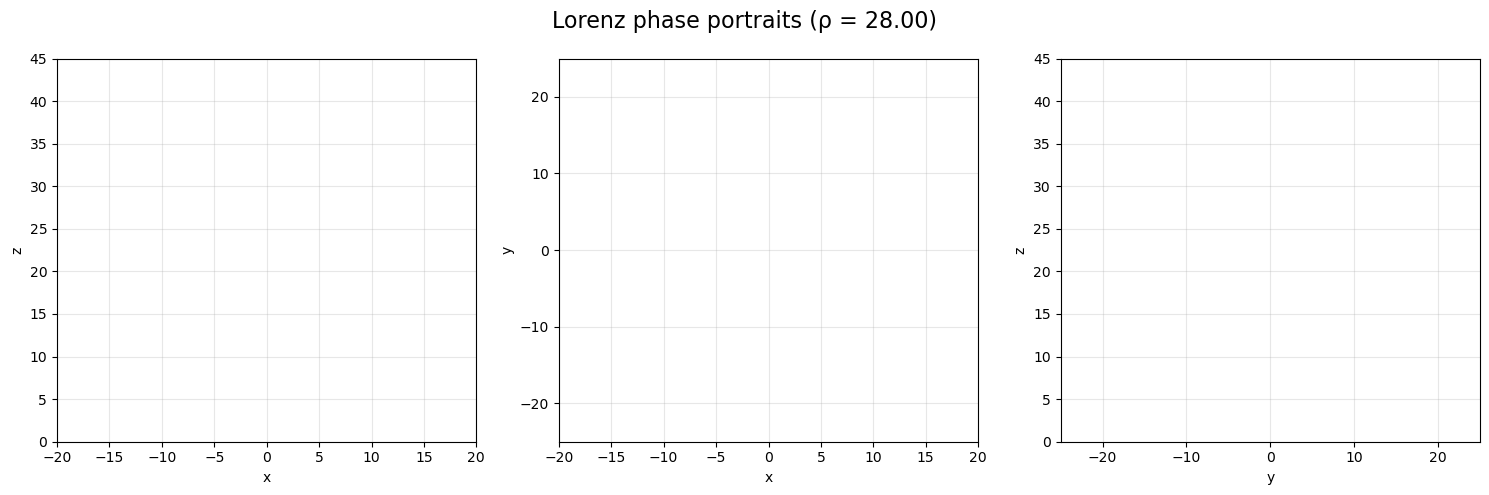

In [2]:
from matplotlib.animation import FuncAnimation, PillowWriter

# === Animate 3 phase-space projections ===
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create line objects for each projection (solid = IC1, dashed = IC2)
lines = []
labels = [("x", "z"), ("x", "y"), ("y", "z")]
for ax, (a, b) in zip(axes, labels):
    (l1,) = ax.plot([], [], lw=1.5)
    (l2,) = ax.plot([], [], lw=1.5, ls="--", alpha=0.8)
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.grid(alpha=0.3)
    lines.append((l1, l2))

# Fix reasonable limits for all subplots
axes[0].set_xlim(-20, 20); axes[0].set_ylim(0, 45)    # x–z
axes[1].set_xlim(-20, 20); axes[1].set_ylim(-25, 25)  # x–y
axes[2].set_xlim(-25, 25); axes[2].set_ylim(0, 45)    # y–z

fig.suptitle("Lorenz phase portraits (animated over ρ)", fontsize=16)

def init():
    for (l1, l2) in lines:
        l1.set_data([], []); l2.set_data([], [])
    return sum(lines, ())

def update(frame):
    X1, Y1, Z1 = X1_list[frame], Y1_list[frame], Z1_list[frame]
    X2, Y2, Z2 = X2_list[frame], Y2_list[frame], Z2_list[frame]

    # x–z
    lines[0][0].set_data(X1, Z1)
    lines[0][1].set_data(X2, Z2)
    # x–y
    lines[1][0].set_data(X1, Y1)
    lines[1][1].set_data(X2, Y2)
    # y–z
    lines[2][0].set_data(Y1, Z1)
    lines[2][1].set_data(Y2, Z2)

    rho = rho_values[frame]
    fig.suptitle(f"Lorenz phase portraits (ρ = {rho:.2f})", fontsize=16)
    return sum(lines, ())

anim_phase = FuncAnimation(fig, update, frames=n_frames,
                           init_func=init, blit=False, interval=250)

plt.tight_layout()

# Save as GIF
writer = PillowWriter(fps=8, metadata={'loop': 0})
anim_phase.save("lorenz_phase_rho_sweep.gif", writer=writer, dpi=120)

print("Saved: lorenz_phase_rho_sweep.gif ✅")

anim_phase.save("lorenz_phase_rho_sweep.mp4", writer="ffmpeg", fps=8, dpi=120)